In [17]:
#IMPORTAMOS LAS LIBRERIAS, EL ARCHIVO Y VISUALIZAMOS LA ESTRUCTURA Y DETALLES DEL ARCHIVO
#Y QUITAMOS LOS PUNTOS DE LAS CIFRAS DE NUESTRA DATA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
df = pd.read_csv('BandaAnchavsDialup.csv')
df['Banda_ancha_fija'] = df['Banda_ancha_fija'].str.replace('.', '').astype(float)
df['Total'] = df['Total'].str.replace('.', '').astype(float)

C:\Users\carlo\AppData\Local\Temp\ipykernel_15756\2502711102.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Banda_ancha_fija'] = df['Banda_ancha_fija'].str.replace('.', '').astype(float)
C:\Users\carlo\AppData\Local\Temp\ipykernel_15756\2502711102.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Total'] = df['Total'].str.replace('.', '').astype(float)


In [18]:
df

,Año,Trimestre,Banda_ancha_fija,Dial_up,Total,Periodo
0,2022,3,11078691.0,12437,11091128.0,Jul-Sept 2022
1,2022,2,10946248.0,12436,10958684.0,Abr-Jun 2022
2,2022,1,10611390.0,12619,10624009.0,Ene-Mar 2022
3,2021,4,10476933.0,12861,10489794.0,Oct-Dic 2021
4,2021,3,10075184.0,10357,10085541.0,Jul-Sept 2021
5,2021,2,9852702.0,10382,9863084.0,Abr-Jun 2021
6,2021,1,9637956.0,10016,9647972.0,Ene-Mar 2021
7,2020,4,9561546.0,10016,9571562.0,Oct-Dic 2020
8,2020,3,9346183.0,10016,9356199.0,Jul-Sept 2020
9,2020,2,9021040.0,10016,9031056.0,Abr-Jun 2020


In [19]:
# DESCRIBIMOS NUESTROS DATOS Y SACAMOS PROMEDIOS PARA DAR UN PRIMER VISTASO 
df.describe(include='all')

,Año,Trimestre,Banda_ancha_fija,Dial_up,Total,Periodo
count,35.000000,35.000000,3.500000e+01,35.000000,3.500000e+01,35
unique,NaN,NaN,NaN,NaN,NaN,35
top,NaN,NaN,NaN,NaN,NaN,Jul-Sept 2022
freq,NaN,NaN,NaN,NaN,NaN,1
mean,2017.885714,2.457143,8.274417e+06,23383.371429,8.297800e+06,NaN
std,2.564135,1.120474,1.408774e+06,10087.397193,1.399611e+06,NaN
min,2014.000000,1.000000,6.362108e+06,9991.000000,6.398398e+06,NaN
25%,2016.000000,1.500000,7.024946e+06,12436.500000,7.057455e+06,NaN
50%,2018.000000,2.000000,8.083533e+06,26911.000000,8.110444e+06,NaN
75%,2020.000000,3.000000,9.244537e+06,32508.500000,9.260442e+06,NaN


VEMOS QUE LA INFORMACION QUE NOS SALE TIENE NUMEROS MUY GRANDES PORQUE ESTAMOS MONITOREANDO A POBLACIONES ENTERAS

PODEMOS VER QUE DEL 2014 AL 2022 CASI SE DUPICLO EL USO DE BANDA ANCHA

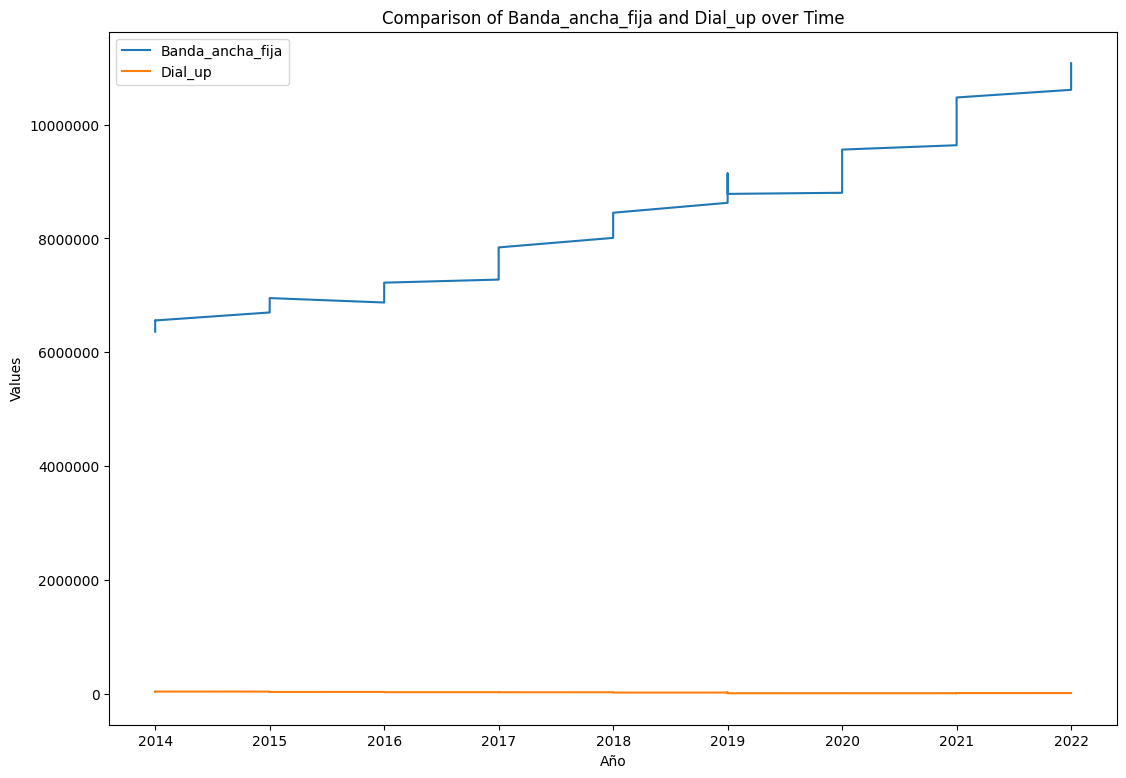

In [37]:

plt.figure(figsize=(13, 9))
plt.plot(df['Año'], df['Banda_ancha_fija'], label='Banda_ancha_fija')
plt.plot(df['Año'], df['Dial_up'], label='Dial_up')
plt.xlabel('Año')
plt.ylabel('Values')
plt.title('Comparison of Banda_ancha_fija and Dial_up over Time')
plt.legend()
 # Display complete values instead of scientific notation
plt.ticklabel_format(style='plain', useOffset=False)
plt.show()


OBSERVAMOS QUE NUESTRA GRAFICA NO SALIO LINEAL SINO CUADRADA, ESTO SE DEBE A QUE NO HAY PUNTOS INTERMEDIOS ENTRE AÑOS, ESTO SE PUEDE RECTIFICAR HACIENDO INTERPOLACION DE DATOS.
ADEMAS PODEMOS OBSERVAR QUE EL DIAL UP ES PRACTICAMENTE DESPRECIABLE EN COMPARACION CON LA BANDA ANCHA 

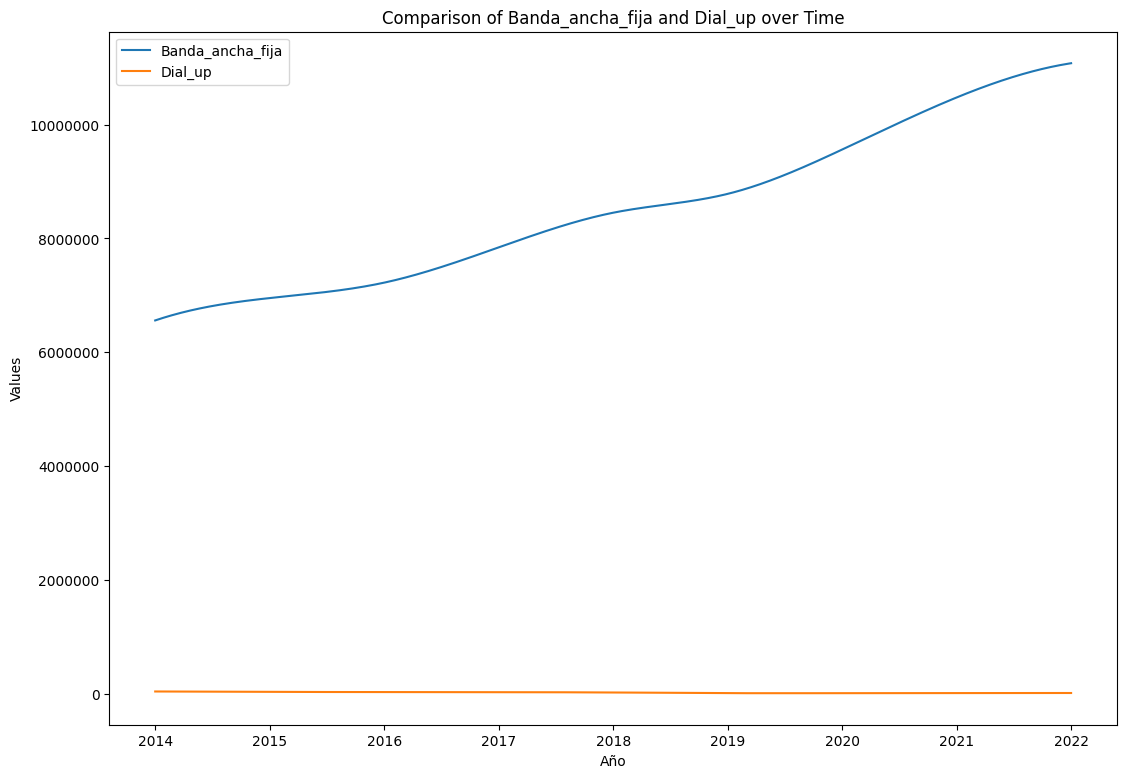

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
 # Create an array with the values of the years
x = np.array(df['Año'])
y1 = np.array(df['Banda_ancha_fija'])
y2 = np.array(df['Dial_up'])
 # Remove duplicate values from x and corresponding y values
x_unique, indices = np.unique(x, return_index=True)
y1_unique = y1[indices]
y2_unique = y2[indices]
 # Perform cubic interpolation for Banda_ancha_fija
f1 = interp1d(x_unique, y1_unique, kind='cubic')
x_interpolated = np.linspace(x_unique[0], x_unique[-1], num=1000)
y1_interpolated = f1(x_interpolated)
 # Perform cubic interpolation for Dial_up
f2 = interp1d(x_unique, y2_unique, kind='cubic')
y2_interpolated = f2(x_interpolated)
 # Plot the interpolated data
plt.figure(figsize=(13, 9))
plt.plot(x_interpolated, y1_interpolated, label='Banda_ancha_fija')
plt.plot(x_interpolated, y2_interpolated, label='Dial_up')
plt.xlabel('Año')
plt.ylabel('Values')
plt.title('Comparison of Banda_ancha_fija and Dial_up over Time')
plt.legend()
 # Display complete values instead of scientific notation
plt.ticklabel_format(style='plain', useOffset=False)
plt.show()

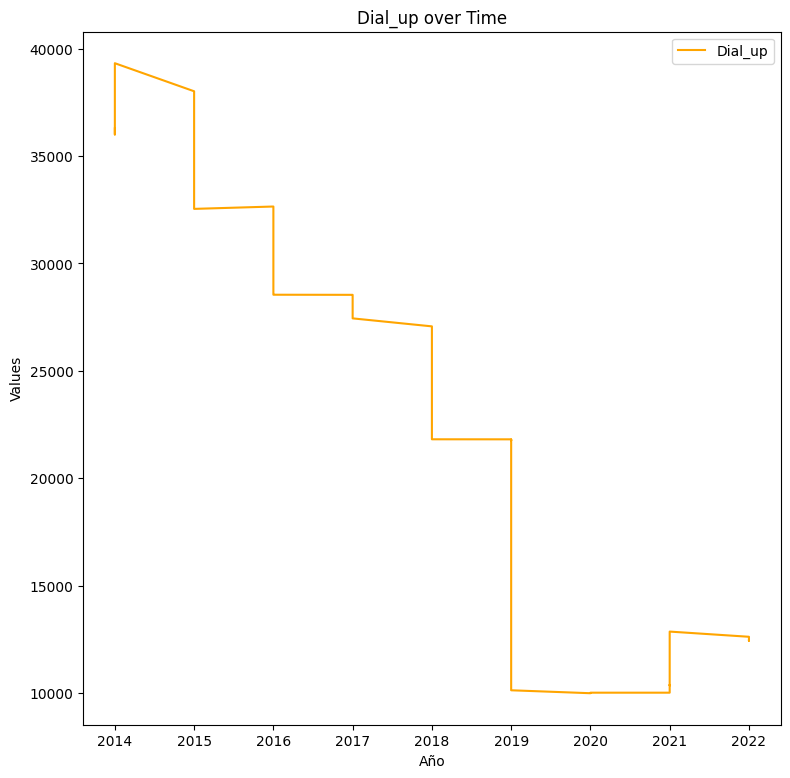

In [39]:
plt.figure(figsize=(9, 9))
plt.plot(df['Año'], df['Dial_up'], label='Dial_up', color = 'orange')
plt.xlabel('Año')
plt.ylabel('Values')
plt.title('Dial_up over Time')
plt.legend()
plt.ticklabel_format(style='plain', useOffset=False)
plt.show()

AQUI PODEMOS VER COMO VA DESPARECIENDO ESTA TECONOLOGIA CON CADA AÑO

In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
df2 = pd.read_csv('Internet_BAF.csv')
df2['Banda_ancha_fija'] = df2['Banda_ancha_fija'].str.replace('.', '').astype(float)
df2['Dial_up'] = df2['Dial_up'].replace('- 0', float('nan')).astype(float)
df2['Total'] = df2['Total'].str.replace('.', '').astype(float)
df2
#VEMOS COMO EL PROMEDIO DE VELOCIDAD EN ARGENTINA ES  BUENO

C:\Users\carlo\AppData\Local\Temp\ipykernel_15756\67685321.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['Banda_ancha_fija'] = df2['Banda_ancha_fija'].str.replace('.', '').astype(float)
C:\Users\carlo\AppData\Local\Temp\ipykernel_15756\67685321.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['Total'] = df2['Total'].str.replace('.', '').astype(float)


,Año,Trimestre,Provincia,Banda_ancha_fija,Dial_up,Total
0,2022,3,Buenos Aires,4715469.0,6.199,4721668.0
1,2022,3,Capital Federal,1545534.0,2.145,1547679.0
2,2022,3,Catamarca,70292.0,1.000,70293.0
3,2022,3,Chaco,144141.0,5.000,144146.0
4,2022,3,Chubut,164874.0,904.000,165778.0
...,...,...,...,...,...,...
835,2014,1,Santa Cruz,26304.0,460.000,26764.0
836,2014,1,Santa Fe,506000.0,612.000,506612.0
837,2014,1,Santiago Del Estero,37124.0,9.000,37133.0
838,2014,1,Tierra Del Fuego,27272.0,766.000,28038.0


In [2]:
import pandas as pd
df3 = pd.read_csv('Internet_Accesos_por_velocidad.csv')
df3


,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,29.985,27.709,290.315,297.915,267.044,124.190,3.618.689,65.821,4.721.668
1,2022,3,Capital Federal,517.000,5.742,34.371,67.829,51.946,28.692,1.253.105,105.477,1.547.679
2,2022,3,Catamarca,71.000,384.000,3.107,5.389,5.099,3.737,50.298,2.208,70.293
3,2022,3,Chaco,461.000,987.000,16.782,18.938,8.049,15.828,79.390,3.711,144.146
4,2022,3,Chubut,109.000,1.444,45.707,30.940,34.682,15.309,17.563,20.024,165.778
...,...,...,...,...,...,...,...,...,...,...,...,...
835,2014,1,Santa Cruz,161.000,1.625,24.972,1.000,1.000,0.000,0,0.000,26.760
836,2014,1,Santa Fe,8.456,124.468,345.225,20.328,6.845,23.000,668,0.000,506.013
837,2014,1,Santiago Del Estero,1.234,10.531,22.817,2.422,109.000,0.000,0,0.000,37.113
838,2014,1,Tierra Del Fuego,12.000,607.000,30.902,6.000,0.000,0.000,0,0.000,31.527


In [34]:
import pandas as pd
df4 = pd.read_csv('Internet_Penetracion.csv')
df4 = df4[df4["Trimestre"] == 4]
df4["Accesos por cada 100 hogares"] = df4["Accesos por cada 100 hogares"].str.replace(",", ".").astype(float)# Agrupar los datos por provincia, trimestre y año, y calcular el crecimiento de accesos por cada 100 hogares
growth = df4.groupby(["Provincia", "Trimestre", "Año"])["Accesos por cada 100 hogares"].sum().reset_index()
# Ordenar el DataFrame por el crecimiento de accesos por cada 100 hogares de forma descendente
sorted_growth = growth.sort_values(by="Accesos por cada 100 hogares", ascending=False)
# Obtener las provincias con mayor crecimiento de accesos por cada 100 hogares
top_provinces = sorted_growth["Provincia"].unique()[:5]  # Cambia el número 5 por el número de provincias que deseas obtener
 # Imprimir las provincias con mayor crecimiento
df4

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
72,2021,4,Buenos Aires,75.66
73,2021,4,Capital Federal,111.27
74,2021,4,Catamarca,55.25
75,2021,4,Chaco,44.05
76,2021,4,Chubut,82.57
...,...,...,...,...
763,2014,4,Santa Cruz,27.80
764,2014,4,Santa Fe,50.00
765,2014,4,Santiago Del Estero,17.27
766,2014,4,Tierra Del Fuego,66.14


In [61]:
import pandas as pd
df4 = pd.read_csv('Internet_Penetracion.csv')
#df4 = df4[df4["Trimestre"] == 3]
df4["Accesos por cada 100 hogares"] = df4["Accesos por cada 100 hogares"].str.replace(",", ".").astype(float)
 # Filtrar los datos para los años 2014 y 2022
filtered_data = df4[df4["Año"].isin([2014, 2022])]
 # Agrupar los datos por provincia y calcular el crecimiento de accesos por cada 100 hogares
grouped_data = filtered_data.groupby(["Provincia", "Año"])["Accesos por cada 100 hogares"].mean().reset_index()
grouped_data = grouped_data.pivot(index="Provincia", columns="Año", values="Accesos por cada 100 hogares")
grouped_data["Crecimiento"] = grouped_data[2022] - grouped_data[2014]
 # Ordenar el DataFrame por el crecimiento de forma descendente
sorted_growth = grouped_data.sort_values(by="Crecimiento", ascending=False)
 # Obtener las provincias con mayor crecimiento
top_provinces = sorted_growth.index[:5]  # Cambia el número 5 por el número de provincias que deseas obtener
 # Imprimir las provincias con mayor crecimiento
df5 = grouped_data.assign(provincia=df4['Provincia'])["Crecimiento"].reset_index()
print("Provincias con mayor crecimiento de accesos por cada 100 hogares:")
for province in top_provinces:
    print(province)
df5.to_csv("Mayor_Crecimiento.csv",index = False)
print(df5.columns)

Provincias con mayor crecimiento de accesos por cada 100 hogares:
San Luis
La Rioja
Chubut
La Pampa
Jujuy
Index(['Provincia', 'Crecimiento'], dtype='object')


In [62]:
#df4.drop('Crecimiento', axis=1, inplace=True)
df5

,Provincia,Crecimiento
0,Buenos Aires,21.639167
1,Capital Federal,4.940833
2,Catamarca,37.187500
3,Chaco,22.738333
4,Chubut,44.331667
5,Corrientes,25.254167
6,Córdoba,33.458333
7,Entre Ríos,28.739167
8,Formosa,23.040833
9,Jujuy,39.321667


In [37]:
#AQUI PODEMOS VER LAS PROVINCIAS QUE TUVIERON UN MAYOR INCREMENTO DE ACCESO A INTERNET POR HOGARES EN LOS ULTIMOS AÑOS 
sorted_growth

Año,2014,2022,Crecimiento
Provincia,,,
San Luis,9.71,81.74,72.03
La Rioja,16.51,80.66,64.15
Chubut,40.60,84.38,43.78
La Pampa,55.78,96.59,40.81
Catamarca,24.71,65.33,40.62
Jujuy,18.37,58.91,40.54
Córdoba,54.23,88.31,34.08
Tierra Del Fuego,65.69,99.51,33.82
Santiago Del Estero,16.49,47.98,31.49


C:\Users\carlo\AppData\Local\Temp\ipykernel_12464\1793715941.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Ingresos (miles de pesos)'] = df['Ingresos (miles de pesos)'].str.replace('.', '').astype(float)


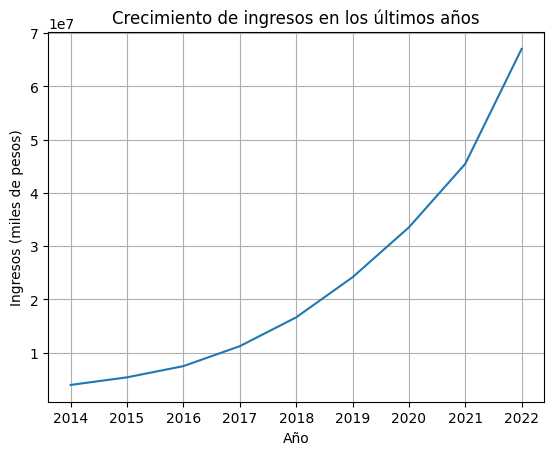

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
df = pd.read_csv('Internet_Ingresos.csv')
df['Ingresos (miles de pesos)'] = df['Ingresos (miles de pesos)'].str.replace('.', '').astype(float)
filtered_data = df[(df['Trimestre'] == 4) & (df['Año'] != 2022) | ((df['Trimestre'] == 3) & (df['Año'] == 2022))]
 # Crear la gráfica de crecimiento de ingresos
plt.plot(filtered_data['Año'], filtered_data['Ingresos (miles de pesos)'])
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')
plt.title('Crecimiento de ingresos en los últimos años')
plt.grid(True)
plt.show()

In [6]:
df

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,3,67055930.0,Jul-Sept 2022
1,2022,2,60335724.0,Abr-Jun 2022
2,2022,1,55589997.0,Ene-Mar 2022
3,2021,4,45467887.0,Oct-Dic 2021
4,2021,3,42999944.0,Jul-Sept 2021
5,2021,2,38239667.0,Abr-Jun 2021
6,2021,1,36676371.0,Ene-Mar 2021
7,2020,4,33539703.0,Oct-Dic 2020
8,2020,3,31997445.0,Jul-Sept 2020
9,2020,2,32102476.0,Abr-Jun 2020
